In [443]:
import glob
import json
import random
import numpy as np
import pandas as pd

item = glob.glob(r'CORD-19-research-challenge/**/pdf_json/*.json',recursive=True)

random_d = np.random.choice(item, int(len(item)*.1))


def my_text():
    
    for j, aJson in enumerate(random_d):
        
        with open(aJson) as my_json:
            
            file_data = json.load(my_json)
            
            my_list = []
            
            for a in file_data['body_text']:
                
                only_text = a['text']
                
                my_list.append(only_text)
        
                my_str ='\n'.join(my_list)
                
            return my_str
        

In [444]:
len(item)

45941

In [445]:
file = my_text()
len(file)

38159

In [446]:
import spacy

spacy_nlp = spacy.load('en_core_web_sm')

def tokenizing(parag):
    
    my_parag = spacy_nlp(parag)
   
    my_return = [sent.text for sent in my_parag.sents]
    
    #my_str = '\n'.join(map(str, my_return))
        
    return my_return

In [447]:
text_onlyToken = tokenizing(file)
#print(text_onlyToken)

#create = pd.DataFrame(text_onlyToken, columns = ['Title'])

In [448]:
import re

def remove_num(mylist): 
    pattern = '[0-9]'
    mylist = [re.sub(pattern, '', i) for i in mylist] 
    return mylist
  

In [449]:
text_noNum = remove_num(text_onlyToken)

In [450]:
create_num = pd.DataFrame(text_noNum, columns = ['Title'])

In [451]:
create_num

,Title
0,Feline coronaviruses (FCoVs) are important pat...
1,"FCoVs are classified into two pathotypes, the ..."
2,"Both FECV and FIPV have two serotypes, type I ..."
3,"Infection with FECV is widespread among cats, ..."
4,"However, a small portion of cats develop FIP d..."
...,...
304,RIG-I and MDA activation induce the polymeriza...
305,These E ligases then synthesize polyubiquitin ...
306,NEMO then interacts with TANK and recruits TBK...
307,"However, the FIPV nsp-mediated"


In [452]:
#text

In [453]:
from sklearn.feature_extraction.text import TfidfVectorizer
#def vectorize(doc, features):
    
    #vectorizer = TfidfVectorizer(max_features= features, stop_words = 'english')
    #X = vectorizer.fit_transform(doc.ravel())
    #return X

In [465]:
#text = create_num['Title'].values
#X = vectorize(text, 2 ** 12)
#X.shape

In [466]:
vectorizer = TfidfVectorizer()

Y = vectorizer.fit_transform(create_num['Title'].values.ravel())

terms = vectorizer.get_feature_names()


In [467]:
from sklearn.cluster import KMeans

my_k = KMeans(n_clusters = 11)

fit_predict = my_k.fit_predict(Y)

In [468]:
centroids = my_k.cluster_centers_.argsort()[:, ::-1]

n_clusters = 11

for i in range(n_clusters):
    
    print("Cluster %d:" % i),
    
    print()
    
    for item in centroids[i, :10]:
        
        print(' %s' % terms[item]),
        
    print
    print()


Cluster 0:

 infection
 df
 cells
 or
 were
 with
 inhibitor
 so
 the
 fipv

Cluster 1:

 that
 we
 nsp
 fipv
 mediated
 nemo
 of
 figure
 fe
 induced

Cluster 2:

 irf
 of
 the
 and
 type
 nemo
 cleavage
 in
 tank
 phosphorylation

Cluster 3:

 figure
 production
 ifn
 tbk
 shown
 upstream
 suggesting
 cleavage
 inhibit
 did

Cluster 4:

 ifn
 the
 levels
 were
 in
 by
 figure
 nsp
 production
 and

Cluster 5:

 fipv
 the
 nsp
 of
 mediated
 mechanistically
 further
 presence
 in
 was

Cluster 6:

 all
 times
 repeated
 three
 were
 means
 experiments
 sd
 the
 data

Cluster 7:

 the
 is
 and
 of
 to
 are
 for
 host
 as
 innate

Cluster 8:

 nemoka
 expression
 feline
 this
 interestingly
 under
 likely
 debilitated
 detected
 study

Cluster 9:

 ab
 catalogue
 anti
 no
 rabbit
 mouse
 antibodies
 myc
 purchased
 namely

Cluster 10:

 nemo
 with
 plasmid
 tagged
 flag
 expressing
 nsp
 or
 cells
 vector



In [472]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 20)
for k in K:
    k_means = KMeans(n_clusters=k).fit(Y)
    k_means.fit(reduced)
    distortions.append(sum(np.min(cdist(reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / reduced.shape[0])

In [473]:
pca = PCA(n_components=0.99)
reduced= pca.fit_transform(Y.toarray())
reduced.shape

(309, 207)

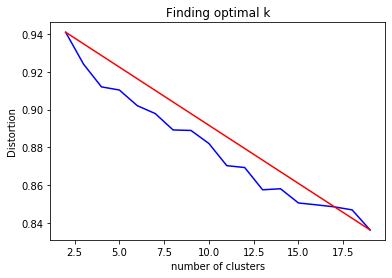

In [474]:
import matplotlib.pyplot as plt
%matplotlib inline

line1 = [K[0], K[-1]]
line2 = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(line1, line2, 'r')
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.title('Finding optimal k')
plt.show()

In [478]:
from sklearn.metrics import silhouette_score

score = silhouette_score(Y, fit_predict)
score

0.06003539274213412

In [489]:
#Text summarization without k-means clustering 
import networkx as nx

text_onlyToken = tokenizing(file)

vec = TfidfVectorizer()
fitting = vec.fit_transform(text_onlyToken)

mat = (fitting*fitting.T)
nx_form =nx.from_scipy_sparse_matrix(mat)

nx_rank =nx.pagerank(nx_form)

ranks = sorted(((points, i) for i,points in nx_rank.items()), reverse = True)

indic = [ranks[i][1] for i in range(4)]

indic.sort()

for i in indic:
    print(fitting[i])




  (0, 238)	0.15988953996514943
  (0, 206)	0.16848672963784814
  (0, 786)	0.3369734592756963
  (0, 548)	0.16848672963784814
  (0, 92)	0.15322104158240996
  (0, 194)	0.1431657899180415
  (0, 1149)	0.15322104158240996
  (0, 749)	0.13917529200529777
  (0, 455)	0.08501354395123024
  (0, 117)	0.15988953996514943
  (0, 841)	0.27835058401059554
  (0, 1059)	0.13565542339084355
  (0, 1141)	0.17380320781096903
  (0, 511)	0.12705823371814481
  (0, 711)	0.1431657899180415
  (0, 259)	0.08690160390548451
  (0, 747)	0.1858626700046182
  (0, 210)	0.12245154195818983
  (0, 587)	0.12245154195818983
  (0, 1061)	0.19187013820932353
  (0, 717)	0.19759283646813655
  (0, 988)	0.11332541205590621
  (0, 224)	0.07611295732939252
  (0, 181)	0.09034037520339343
  (0, 1156)	0.08266847129472439
  (0, 552)	0.3913705065207805
  (0, 459)	0.1222403750868846
  (0, 1074)	0.2728386479146871
  (0, 161)	0.16551949826728488
  (0, 758)	0.26503342827095305
  (0, 1090)	0.2715085911532724
  (0, 1060)	0.2715085911532724
  (0, 938)